
##Pre-processing Data
In this project, we will explore several methods of data preprocessing for Machine Learning.

**Problem:** Ensuring proper data cleaning and preprocessing to prepare datasets for Machine Learning applications.



In [8]:
#Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Here, we’re going to use the E-commerce Customer Behavior dataset from Kaggle.
Courtesy: https://www.kaggle.com/datasets/dhairyajeetsingh/ecommerce-customer-behavior-dataset

In [9]:
# Reading Dataset from local csv file
df_cust = pd.read_csv('ecommerce_customer_churn_dataset.csv')

**Note:**
Pandas can read datasets in various formats:

CSV - read_csv(\<filename\>) :  Reads comma separated files

TSV - read_csv(\<filename\>, sep= "\t") : Reads a "tab" delimited file, you can replace separator with :, | and read different types of delimited file

Excel - read_excel(\<filename\>, sheet_name=\<worksheet_name\>) : Reads .xls or .xlsx file




**Let us check dimension of Dataset**





In [10]:
print(df_cust.shape)

(50000, 25)


This data set has 25 features and 50000 samples

Let' examine few rows from this dataset

In [11]:
print(df_cust.head())

    Age  Gender Country        City  Membership_Years  Login_Frequency  \
0  43.0    Male  France   Marseille               2.9             14.0   
1  36.0    Male      UK  Manchester               1.6             15.0   
2  45.0  Female  Canada   Vancouver               2.9             10.0   
3  56.0  Female     USA    New York               2.6             10.0   
4  35.0    Male   India       Delhi               3.1             29.0   

   Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  \
0                  27.4                6.0                   50.6   
1                  42.7               10.3                   37.7   
2                  24.8                1.6                   70.9   
3                  38.4               14.8                   41.7   
4                  51.4                NaN                   19.1   

   Wishlist_Items  Total_Purchases  Average_Order_Value  \
0             3.0              9.0                94.72   
1             1.0     

By default, the head() function displays the first 5 rows and up to 20 columns. To view additional rows and columns, these defaults can be adjusted, allowing the DataFrame to be formatted into a more readable table.

In [12]:
pd.set_option('display.max_columns', 25)
print(df_cust.head(3).to_string())


    Age  Gender Country        City  Membership_Years  Login_Frequency  Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  Wishlist_Items  Total_Purchases  Average_Order_Value  Days_Since_Last_Purchase  Discount_Usage_Rate  Returns_Rate  Email_Open_Rate  Customer_Service_Calls  Product_Reviews_Written  Social_Media_Engagement_Score  Mobile_App_Usage  Payment_Method_Diversity  Lifetime_Value  Credit_Balance  Churned Signup_Quarter
0  43.0    Male  France   Marseille               2.9             14.0                  27.4                6.0                   50.6             3.0              9.0                94.72                      34.0                46.40           2.0             17.9                     9.0                      4.0                           16.3              20.8                       1.0          953.33          2278.0        0             Q1
1  36.0    Male      UK  Manchester               1.6             15.0                  42.7              

Let us see the information about dataset

info() - gives us a quick snapshot of DataFrame. It shows us how many rows, columns & its data type, and whether there are any missing values




In [13]:
print(df_cust.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

Looking at the dataset, you’ll notice a mix of float, integer, and text/object columns. Some columns also have missing entries, which shows up when the non‑null count is below 50,000.


In [14]:
df_cust.columns[df_cust.isna().any()].tolist()

['Age',
 'Session_Duration_Avg',
 'Pages_Per_Session',
 'Wishlist_Items',
 'Days_Since_Last_Purchase',
 'Discount_Usage_Rate',
 'Returns_Rate',
 'Email_Open_Rate',
 'Customer_Service_Calls',
 'Product_Reviews_Written',
 'Social_Media_Engagement_Score',
 'Mobile_App_Usage',
 'Payment_Method_Diversity',
 'Credit_Balance']

To clean things up, let’s replace the nulls in Session_Duration_Avg, Returns_Rate, and Email_Open_Rate with their average values.

In [15]:
avg_features = ['Session_Duration_Avg','Returns_Rate','Email_Open_Rate', 'Discount_Usage_Rate', 'Payment_Method_Diversity','Credit_Balance', 'Mobile_App_Usage']


describe() : generates summary statistics for numeric columns, like mean, median, min, max, and quartiles. It’s a quick way to understand the distribution and spread of your dataset’s values.


In [16]:
df_cust[avg_features].describe()

,Session_Duration_Avg,Returns_Rate,Email_Open_Rate,Discount_Usage_Rate,Payment_Method_Diversity,Credit_Balance,Mobile_App_Usage
count,46601.000000,45509.000000,47472.000000,46500.000000,47500.000000,44500.000000,45000.000000
mean,27.660754,6.680913,20.937980,41.997485,2.353874,1966.233258,19.371607
std,10.871013,6.143027,14.252561,21.373642,1.110012,1225.072166,9.419252
min,1.000000,0.000000,0.000000,0.240000,1.000000,0.000000,0.000000
25%,19.700000,2.900000,9.900000,25.300000,2.000000,1049.000000,12.500000
50%,26.800000,5.400000,19.700000,40.200000,2.000000,1896.000000,18.600000
75%,34.700000,9.100000,30.400000,57.000000,3.000000,2791.000000,25.500000
max,75.600000,99.615734,91.700000,116.640000,5.000000,7197.000000,61.900000


Let’s take a look at how the average feature values have changed in the data after we applied the transformation.

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

avgimputer = SimpleImputer(strategy='mean')
col_trans = ColumnTransformer([('avg_imputer', avgimputer, avg_features)], remainder='passthrough').set_output(transform="pandas")
df_cust_trans = col_trans.fit_transform(df_cust)

Here, We’ve imported SimpleImputer from the scikit‑learn library.

Scikit-learn is a free and open‑source Python package offering efficient tools for machine learning and data analysis.

SimpleImputer serves as a preprocessing utility that helps us handle missing numerical values in a dataset.


In [18]:
df_cust_trans.describe()

,avg_imputer__Session_Duration_Avg,avg_imputer__Returns_Rate,avg_imputer__Email_Open_Rate,avg_imputer__Discount_Usage_Rate,avg_imputer__Payment_Method_Diversity,avg_imputer__Credit_Balance,avg_imputer__Mobile_App_Usage,remainder__Age,remainder__Membership_Years,remainder__Login_Frequency,remainder__Pages_Per_Session,remainder__Cart_Abandonment_Rate,remainder__Wishlist_Items,remainder__Total_Purchases,remainder__Average_Order_Value,remainder__Days_Since_Last_Purchase,remainder__Customer_Service_Calls,remainder__Product_Reviews_Written,remainder__Social_Media_Engagement_Score,remainder__Lifetime_Value,remainder__Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47505.000000,50000.000000,50000.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,49832.000000,46500.000000,44000.000000,50000.000000,50000.000000
mean,27.660754,6.680913,20.937980,41.997485,2.353874,1966.233258,19.371607,37.802968,2.984009,11.624660,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,5.681831,2.853312,29.364466,1440.626292,0.289000
std,10.494997,5.860648,13.887576,20.611979,1.081905,1155.729342,8.935878,11.834668,2.059105,7.810657,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,2.676052,2.328948,20.574021,907.249443,0.453302
min,1.000000,0.000000,0.000000,0.240000,1.000000,0.000000,0.000000,5.000000,0.100000,0.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.200000,3.100000,10.500000,26.500000,2.000000,1164.000000,13.200000,29.000000,1.400000,6.000000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,4.000000,1.000000,13.200000,789.817500,0.000000
50%,27.660754,6.000000,20.800000,41.997485,2.000000,1966.233258,19.371607,38.000000,2.500000,11.000000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,5.000000,2.000000,27.600000,1243.415000,0.000000
75%,34.000000,8.600000,29.700000,55.560000,3.000000,2664.000000,24.600000,46.000000,4.000000,17.000000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,7.000000,4.000000,43.100000,1874.000000,1.000000
max,75.600000,99.615734,91.700000,116.640000,5.000000,7197.000000,61.900000,200.000000,10.000000,46.000000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,21.000000,21.000000,100.000000,8987.240000,1.000000


Now let’s use SimpleImputer to clean up the dataset by replacing nulls in Age, Wishlist_Items, and Customer_service_calls with the median values.



In [19]:
med_features = ['Age','Wishlist_Items','Customer_Service_Calls']
medimputer = SimpleImputer(strategy='median')
col_trans = ColumnTransformer([('avg_imputer', avgimputer, avg_features),
                               ('med_imputer', medimputer, med_features)], remainder='passthrough').set_output(transform="pandas")
df_cust_trans = col_trans.fit_transform(df_cust)

ColumnTransformer() - lets you apply different preprocessing steps to different columns at once in a single pipeline.

In [20]:
df_cust_trans.describe()

,avg_imputer__Session_Duration_Avg,avg_imputer__Returns_Rate,avg_imputer__Email_Open_Rate,avg_imputer__Discount_Usage_Rate,avg_imputer__Payment_Method_Diversity,avg_imputer__Credit_Balance,avg_imputer__Mobile_App_Usage,med_imputer__Age,med_imputer__Wishlist_Items,med_imputer__Customer_Service_Calls,remainder__Membership_Years,remainder__Login_Frequency,remainder__Pages_Per_Session,remainder__Cart_Abandonment_Rate,remainder__Total_Purchases,remainder__Average_Order_Value,remainder__Days_Since_Last_Purchase,remainder__Product_Reviews_Written,remainder__Social_Media_Engagement_Score,remainder__Lifetime_Value,remainder__Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47000.000000,50000.000000,50000.000000,50000.000000,47000.000000,46500.000000,44000.000000,50000.000000,50000.000000
mean,27.660754,6.680913,20.937980,41.997485,2.353874,1966.233258,19.371607,37.812800,4.274520,5.679540,2.984009,11.624660,8.737811,57.079973,13.111576,123.117330,29.792872,2.853312,29.364466,1440.626292,0.289000
std,10.494997,5.860648,13.887576,20.611979,1.081905,1155.729342,8.935878,11.535688,3.060573,2.671844,2.059105,7.810657,3.778220,16.282723,7.017312,175.569714,29.695062,2.328948,20.574021,907.249443,0.453302
min,1.000000,0.000000,0.000000,0.240000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.100000,0.000000,1.000000,0.000000,-13.000000,26.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.200000,3.100000,10.500000,26.500000,2.000000,1164.000000,13.200000,30.000000,2.000000,4.000000,1.400000,6.000000,6.000000,46.400000,8.000000,87.050000,9.000000,1.000000,13.200000,789.817500,0.000000
50%,27.660754,6.000000,20.800000,41.997485,2.000000,1966.233258,19.371607,38.000000,4.000000,5.000000,2.500000,11.000000,8.400000,58.100000,12.000000,112.970000,21.000000,2.000000,27.600000,1243.415000,0.000000
75%,34.000000,8.600000,29.700000,55.560000,3.000000,2664.000000,24.600000,45.000000,6.000000,7.000000,4.000000,17.000000,11.200000,68.700000,17.000000,144.440000,41.000000,4.000000,43.100000,1874.000000,1.000000
max,75.600000,99.615734,91.700000,116.640000,5.000000,7197.000000,61.900000,200.000000,28.000000,21.000000,10.000000,46.000000,24.100000,143.743350,128.700000,9666.379178,287.000000,21.000000,100.000000,8987.240000,1.000000


Next, we’ll apply SimpleImputer to fill missing values in selected columns using their most frequent entries.


In [21]:
mode_features = ['Pages_Per_Session','Days_Since_Last_Purchase','Product_Reviews_Written','Social_Media_Engagement_Score']
modeimputer = SimpleImputer(strategy='most_frequent')
col_trans = ColumnTransformer([('avg_imputer', avgimputer, avg_features),
                               ('med_imputer', medimputer, med_features),
                               ('mode_imputer', modeimputer, mode_features)],
                               remainder='passthrough').set_output(transform="pandas")
df_cust_trans = col_trans.fit_transform(df_cust)

When you set remainder="passthrough", it just means any columns you didn’t transform will still be carried forward instead of being dropped.

And if you use set_output(transform="pandas"), it will give you back a pandas DataFrame with proper column names, which makes the results much easier to read and work with.


In [22]:
df_cust_trans.describe()

,avg_imputer__Session_Duration_Avg,avg_imputer__Returns_Rate,avg_imputer__Email_Open_Rate,avg_imputer__Discount_Usage_Rate,avg_imputer__Payment_Method_Diversity,avg_imputer__Credit_Balance,avg_imputer__Mobile_App_Usage,med_imputer__Age,med_imputer__Wishlist_Items,med_imputer__Customer_Service_Calls,mode_imputer__Pages_Per_Session,mode_imputer__Days_Since_Last_Purchase,mode_imputer__Product_Reviews_Written,mode_imputer__Social_Media_Engagement_Score,remainder__Membership_Years,remainder__Login_Frequency,remainder__Cart_Abandonment_Rate,remainder__Total_Purchases,remainder__Average_Order_Value,remainder__Lifetime_Value,remainder__Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,27.660754,6.680913,20.937980,41.997485,2.353874,1966.233258,19.371607,37.812800,4.274520,5.679540,8.705542,28.065300,2.723580,25.840730,2.984009,11.624660,57.079973,13.111576,123.117330,1440.626292,0.289000
std,10.494997,5.860648,13.887576,20.611979,1.081905,1155.729342,8.935878,11.535688,3.060573,2.671844,3.665344,29.591317,2.295194,21.530263,2.059105,7.810657,16.282723,7.017312,175.569714,907.249443,0.453302
min,1.000000,0.000000,0.000000,0.240000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.000000
25%,20.200000,3.100000,10.500000,26.500000,2.000000,1164.000000,13.200000,30.000000,2.000000,4.000000,6.200000,7.000000,1.000000,5.700000,1.400000,6.000000,46.400000,8.000000,87.050000,789.817500,0.000000
50%,27.660754,6.000000,20.800000,41.997485,2.000000,1966.233258,19.371607,38.000000,4.000000,5.000000,8.200000,19.000000,2.000000,23.700000,2.500000,11.000000,58.100000,12.000000,112.970000,1243.415000,0.000000
75%,34.000000,8.600000,29.700000,55.560000,3.000000,2664.000000,24.600000,45.000000,6.000000,7.000000,11.000000,39.000000,4.000000,40.700000,4.000000,17.000000,68.700000,17.000000,144.440000,1874.000000,1.000000
max,75.600000,99.615734,91.700000,116.640000,5.000000,7197.000000,61.900000,200.000000,28.000000,21.000000,24.100000,287.000000,21.000000,100.000000,10.000000,46.000000,143.743350,128.700000,9666.379178,8987.240000,1.000000


Let’s quickly check if there are still any columns with missing data.


In [23]:
df_cust_trans.columns[df_cust_trans.isna().any()].tolist()

[]

isna() - checks for missing values in a DataFrame or Series. It returns a boolean mask, with True where values are null and False otherwise.

any() - checks if at least one value in a Series or DataFrame is True.


tolist() - converts a pandas Series or DataFrame values into a plain Python list


Next, let’s create visualizations to examine how the values are distributed across each column.



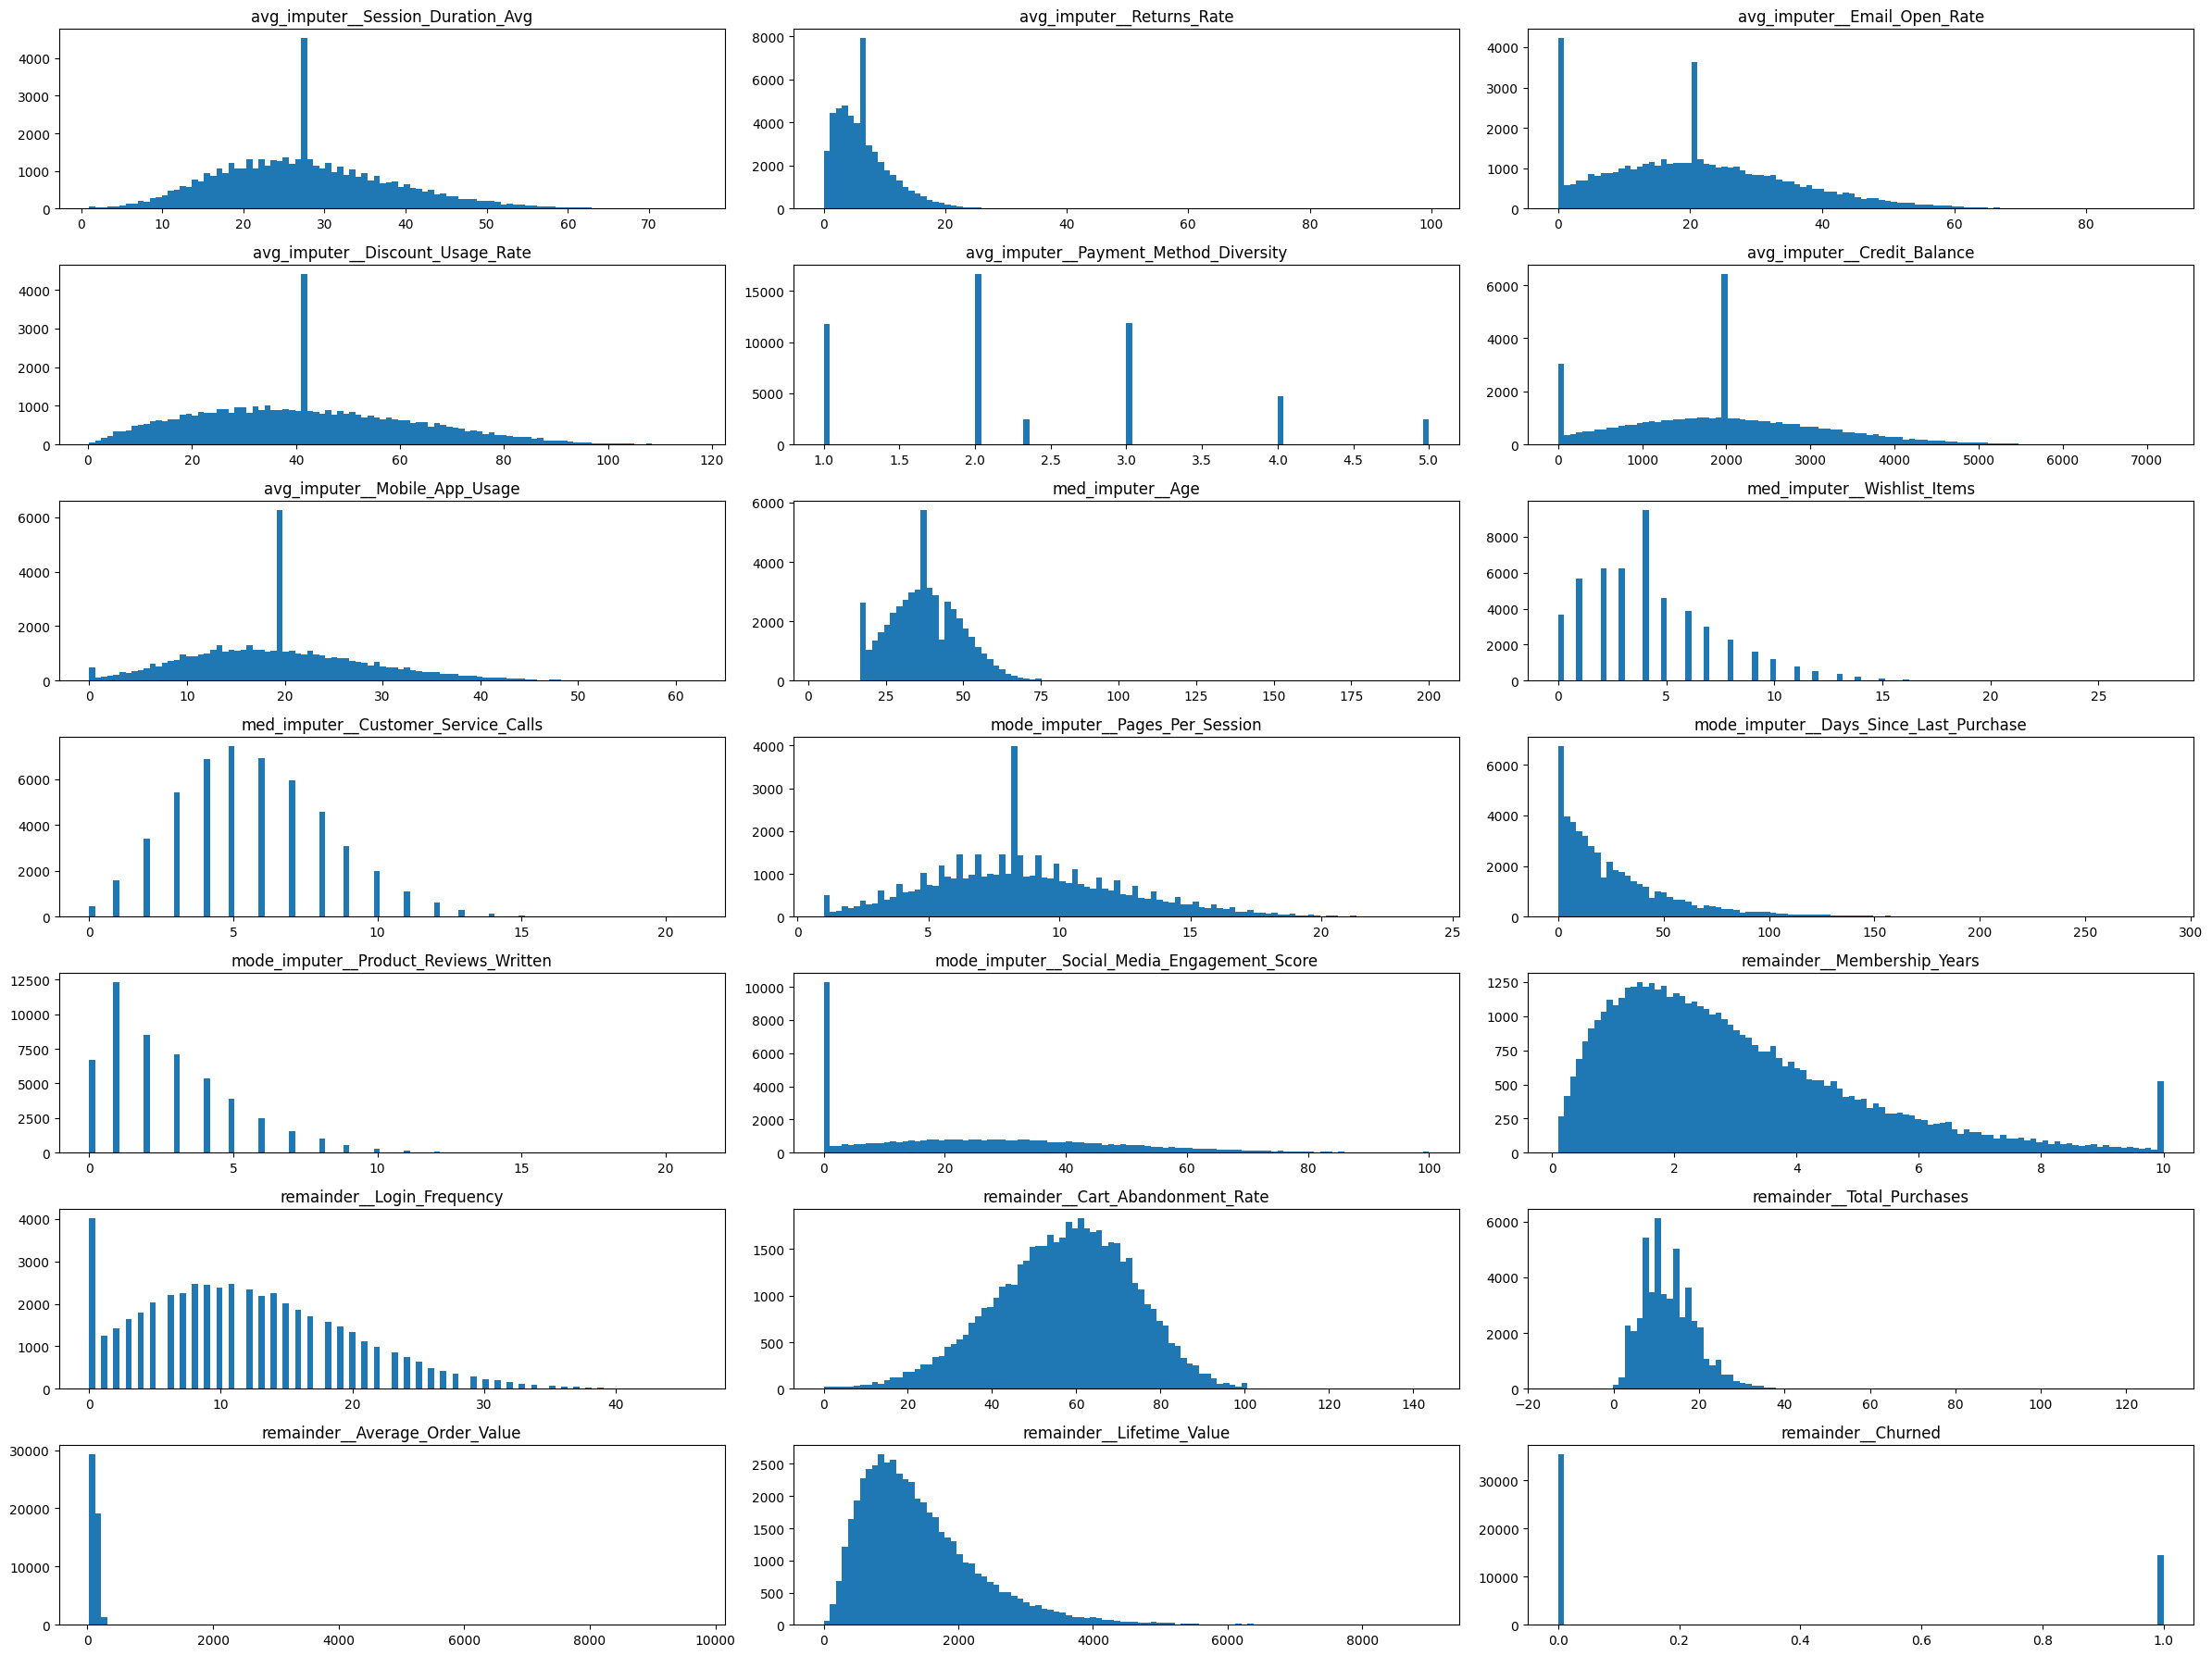

In [24]:
numeric_cols=df_cust_trans.columns[df_cust_trans.dtypes != 'object']
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(24,18))
axes=axes.ravel()
idx=0
for col in numeric_cols:
    if idx < len(axes): # Added a check to prevent IndexError
        axes[idx].set_title(col)
        axes[idx].hist(df_cust_trans[col],bins=100)
    idx+=1
plt.tight_layout()
plt.show()

The above  code builds a grid of histograms where each subplot shows the distribution of one numeric column. By arranging them side\-by\-side, thus you can easily see how features are spread out, spot skewness, or detect outliers.

- **Type of chart**: Histograms are used to show how values are distributed for each numeric column.
- **Grid**: A grid of plots is created (7 rows × 3 columns) to organize multiple charts on one canvas.
- **Subplot**: Each subplot corresponds to one column, with its own title and histogram.



The data isn’t normalized — the ranges vary a lot and some columns have outliers. So, we’ll start by spotting outliers with boxplots, and then normalize the data.

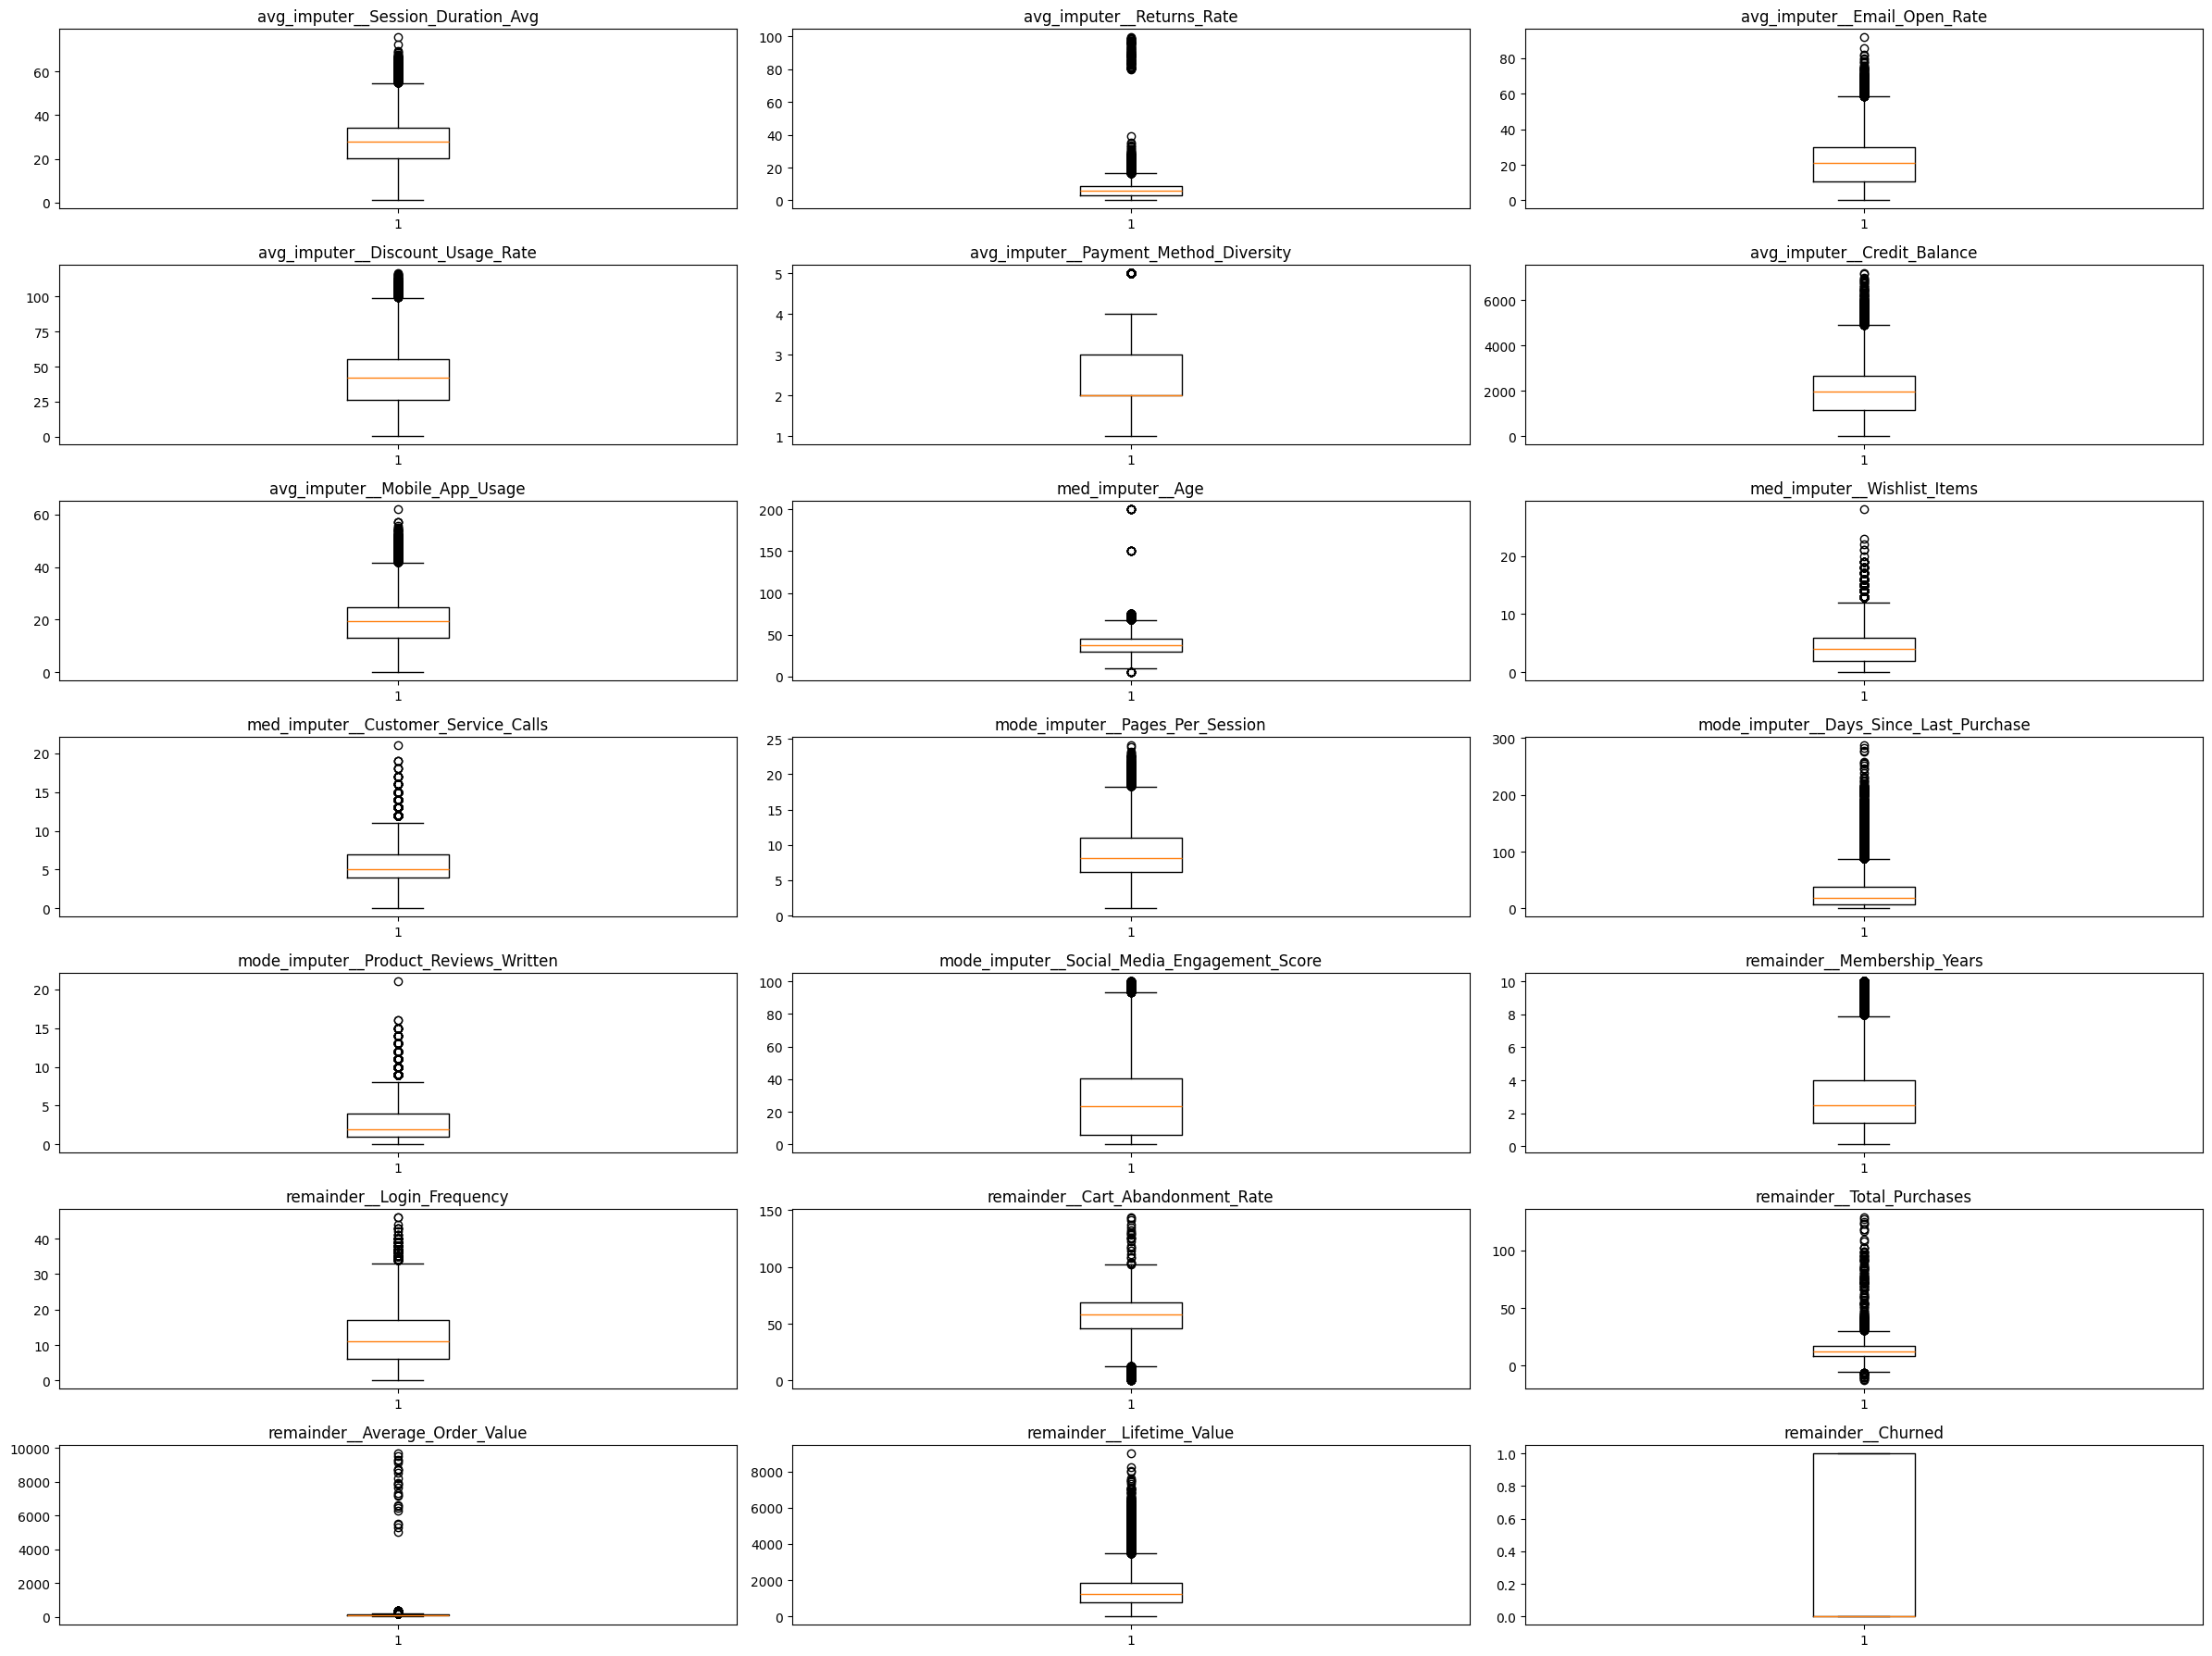

In [25]:
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(24,18))
axes=axes.ravel()
idx=0
for col in numeric_cols:
    axes[idx].set_title(col)
    axes[idx].boxplot(df_cust_trans[col])
    idx+=1
plt.tight_layout()
plt.show()

Next, let’s analyze scatter plots of the numeric columns in relation to the Age column.




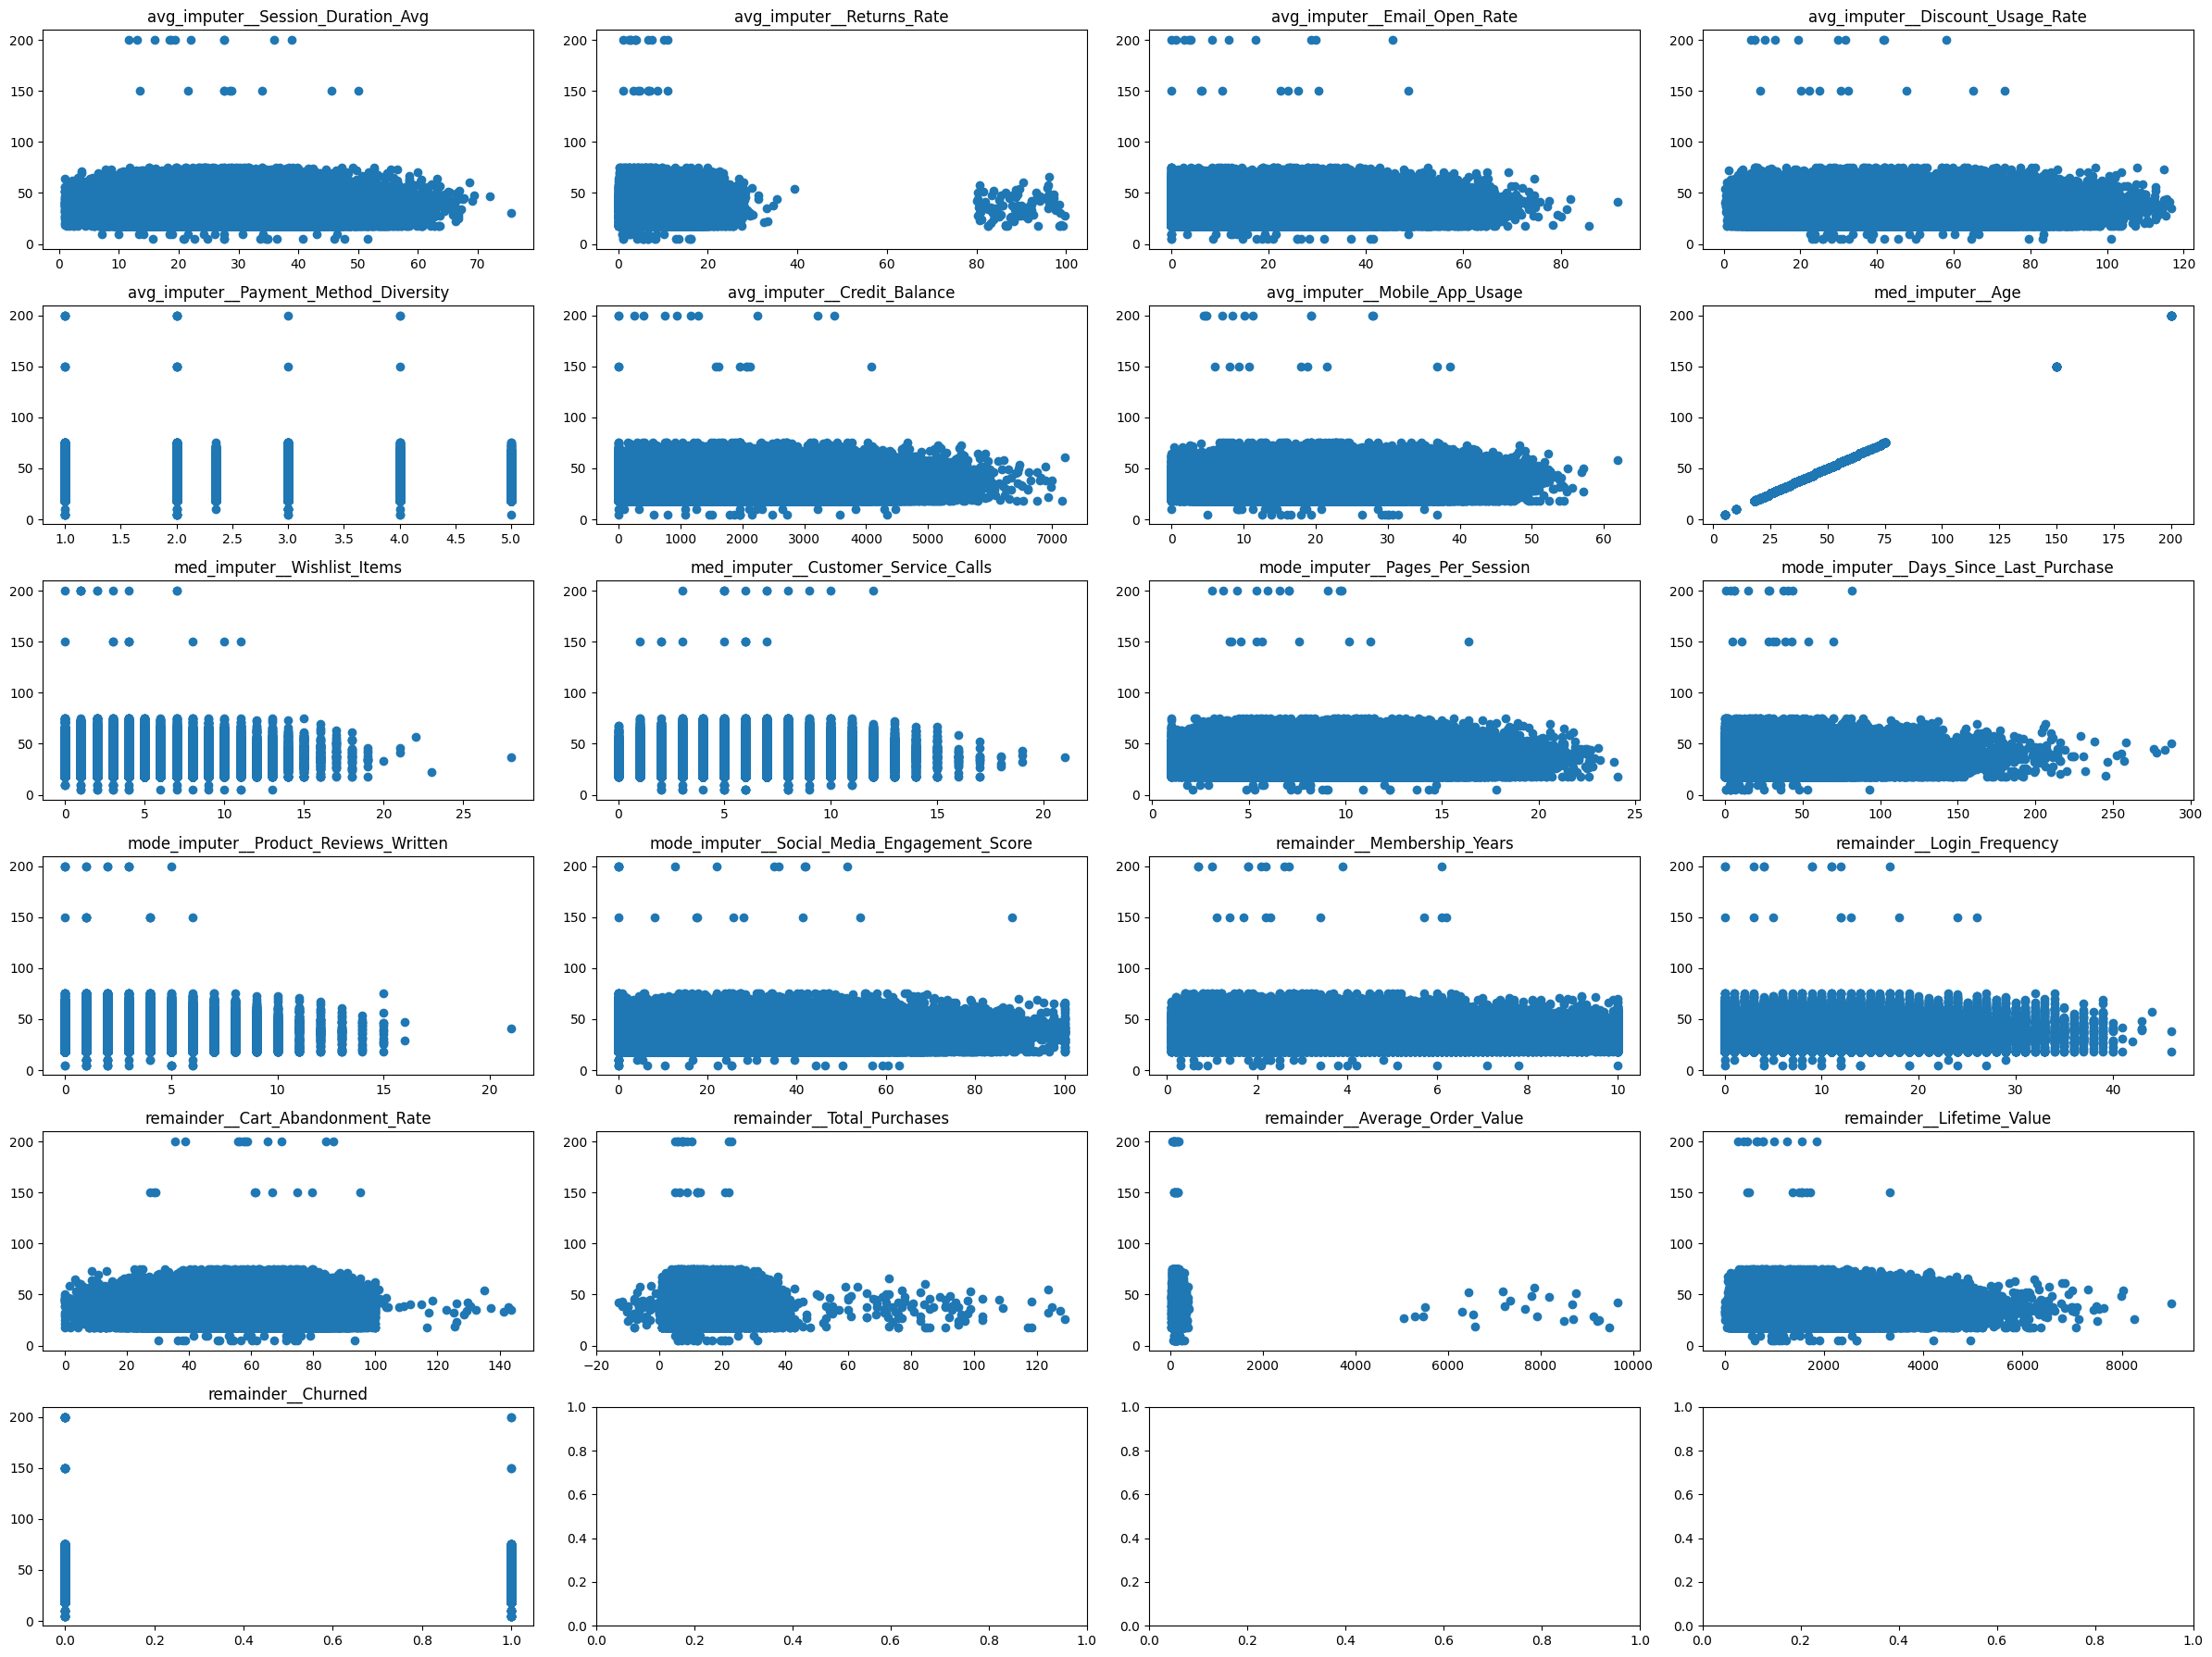

In [26]:
y=df_cust_trans['med_imputer__Age']
fig, axes = plt.subplots(nrows=6,ncols=4, figsize=(24,18))
axes=axes.ravel()
idx=0
for col in numeric_cols:
    axes[idx].set_title(col)
    axes[idx].scatter(df_cust_trans[col],y)
    idx+=1
plt.tight_layout()
plt.show()

Next, we’ll handle the outliers by applying the Winsorize technique.

- Winsorizing is a statistical method used to limit extreme values in data.
- Instead of removing outliers completely, it replaces extreme values (both very high and very low) with the nearest values within a chosen percentile range.
- Example: If you Winsorize at the 5th and 95th percentiles, values below the 5th percentile are set to the 5th percentile value, and values above the 95th percentile.


In [27]:
def winsorize(df, col, lower=0.01, upper=0.99):
   low_val = df[col].quantile(lower)
   high_val = df[col].quantile(upper)
   df[col] = np.clip(df[col], low_val, high_val)
   return df



In [28]:
for col in numeric_cols:
  df_cust_trans = winsorize(df_cust_trans,col)



Now, we’ll re‑plot the scatter plots after removing the outliers to examine the cleaned data.

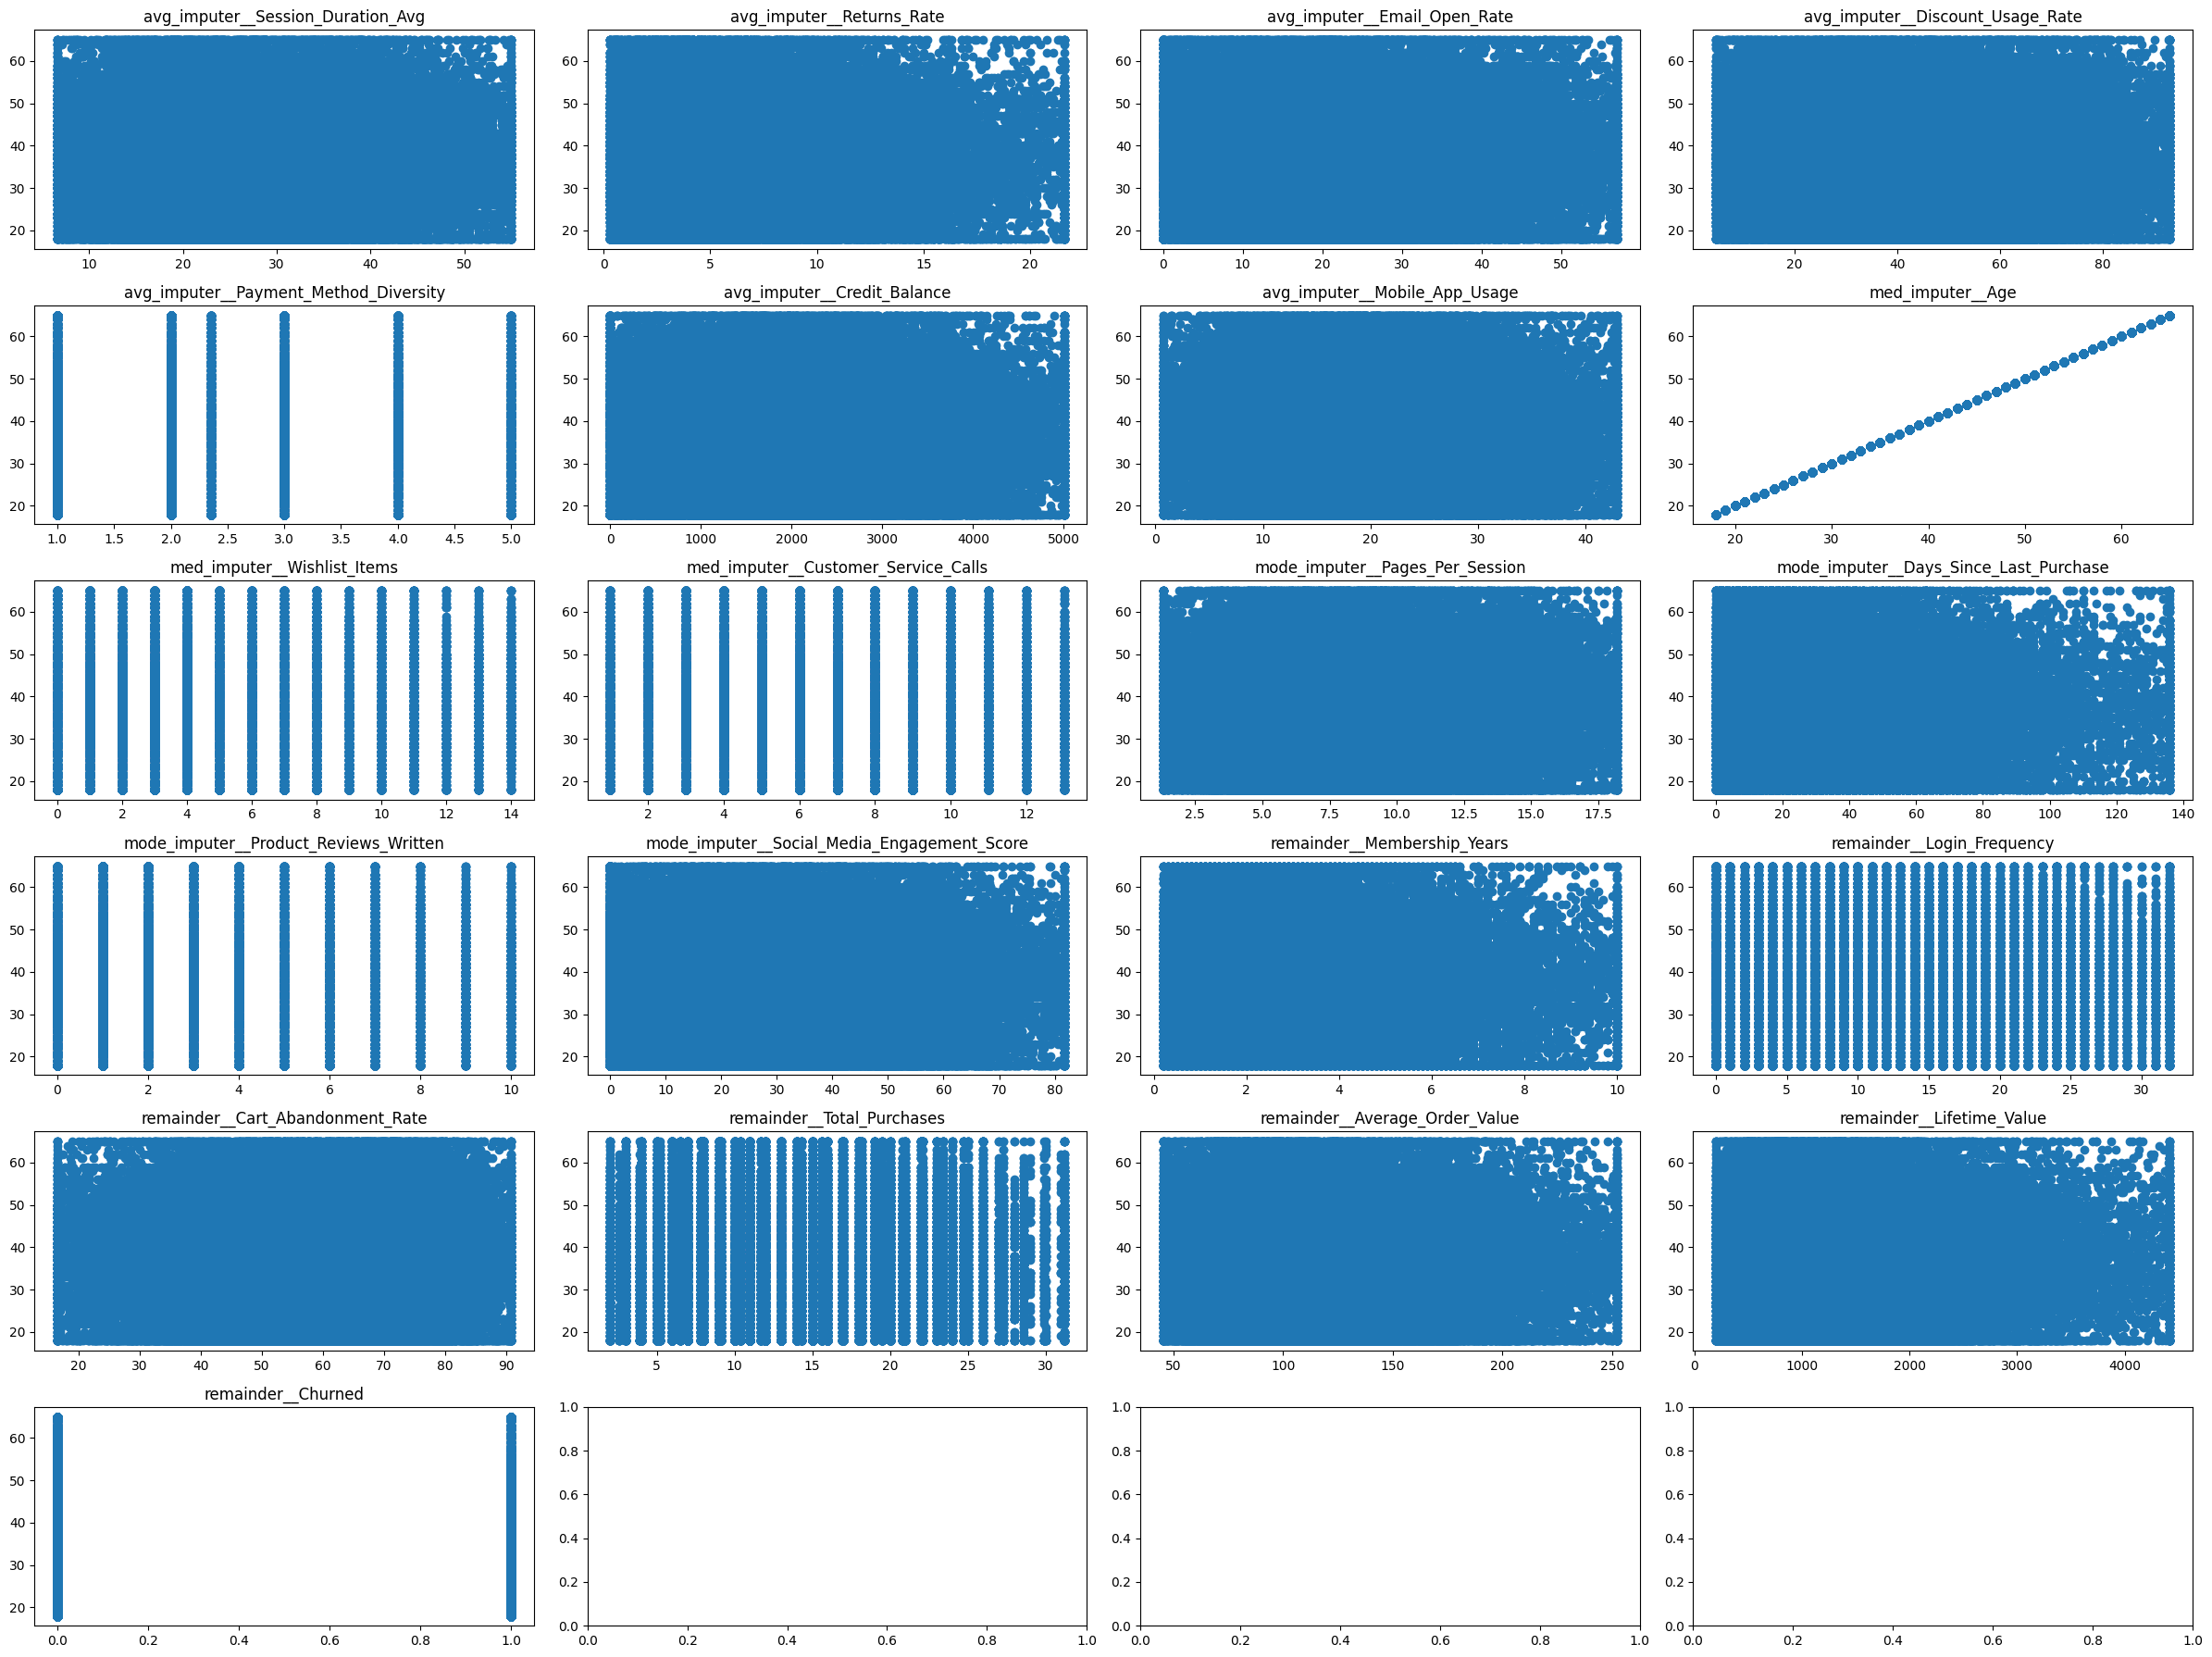

In [29]:
y=df_cust_trans['med_imputer__Age']
fig, axes = plt.subplots(nrows=6,ncols=4, figsize=(24,18))
axes=axes.ravel()
idx=0
for col in numeric_cols:
    axes[idx].set_title(col)
    axes[idx].scatter(df_cust_trans[col],y)
    idx+=1
plt.tight_layout()
plt.show()

Let’s scale the numeric columns so they’re centered at 0 with variance 1, giving all features the same influence in training. We’ll use StandardScaler to do this.



In [30]:
from sklearn.preprocessing import StandardScaler

col_scaler = ColumnTransformer([("num_data", StandardScaler(), numeric_cols),],
                               remainder='passthrough').set_output(transform="pandas")
df_cust_scaled = col_scaler.fit_transform(df_cust_trans)

StandardScaler() -transforms numeric features to have mean\=0 and variance\=1. This ensures all columns are on the same scale, preventing large‑range features from dominating model training

In [31]:
df_cust_scaled.describe()

,num_data__avg_imputer__Session_Duration_Avg,num_data__avg_imputer__Returns_Rate,num_data__avg_imputer__Email_Open_Rate,num_data__avg_imputer__Discount_Usage_Rate,num_data__avg_imputer__Payment_Method_Diversity,num_data__avg_imputer__Credit_Balance,num_data__avg_imputer__Mobile_App_Usage,num_data__med_imputer__Age,num_data__med_imputer__Wishlist_Items,num_data__med_imputer__Customer_Service_Calls,num_data__mode_imputer__Pages_Per_Session,num_data__mode_imputer__Days_Since_Last_Purchase,num_data__mode_imputer__Product_Reviews_Written,num_data__mode_imputer__Social_Media_Engagement_Score,num_data__remainder__Membership_Years,num_data__remainder__Login_Frequency,num_data__remainder__Cart_Abandonment_Rate,num_data__remainder__Total_Purchases,num_data__remainder__Average_Order_Value,num_data__remainder__Lifetime_Value,num_data__remainder__Churned
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-4.017409e-16,4.033751e-16,1.818989e-17,-1.826095e-17,-2.642508e-16,1.989520e-17,1.830358e-16,-2.596323e-16,1.251976e-16,-4.938272e-17,5.641709e-16,7.929657e-17,-4.131806e-17,8.697043e-17,-2.651035e-16,3.478107e-17,7.673862e-18,2.316369e-16,9.407586e-17,-9.762857e-17,6.870948e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.036323e+00,-1.379414e+00,-1.521137e+00,-1.826400e+00,-1.251392e+00,-1.716946e+00,-2.113401e+00,-1.782070e+00,-1.414477e+00,-1.781862e+00,-2.042588e+00,-9.840524e-01,-1.205141e+00,-1.208506e+00,-1.352749e+00,-1.500666e+00,-2.537946e+00,-1.771100e+00,-1.704752e+00,-1.411868e+00,-6.375498e-01
25%,-7.203269e-01,-7.591560e-01,-7.563769e-01,-7.573748e-01,-3.270872e-01,-6.982743e-01,-6.964337e-01,-6.985067e-01,-7.506744e-01,-6.396575e-01,-6.891226e-01,-7.360205e-01,-7.607444e-01,-9.411857e-01,-7.697732e-01,-7.242240e-01,-6.681313e-01,-8.045689e-01,-7.419689e-01,-7.370380e-01,-6.375498e-01
50%,1.608806e-03,-1.167458e-01,-6.183219e-03,2.588236e-03,-3.270872e-01,3.798246e-03,3.163578e-03,2.386910e-02,-8.687184e-02,-2.589226e-01,-1.366878e-01,-3.108229e-01,-3.163480e-01,-9.701635e-02,-2.353785e-01,-7.718872e-02,6.351092e-02,-1.602148e-01,-1.443825e-01,-2.173839e-01,-6.375498e-01
75%,6.150224e-01,4.592082e-01,6.420424e-01,6.676646e-01,5.972177e-01,6.144471e-01,5.958406e-01,6.559479e-01,5.769307e-01,5.025473e-01,6.367208e-01,3.978396e-01,5.724447e-01,7.002547e-01,4.933415e-01,6.992536e-01,7.263663e-01,6.452278e-01,5.811593e-01,5.050320e-01,1.568505e+00
max,2.647076e+00,3.338978e+00,2.630420e+00,2.503690e+00,2.445828e+00,2.662301e+00,2.670281e+00,2.461887e+00,3.232141e+00,2.786957e+00,2.625486e+00,3.834853e+00,3.238823e+00,2.623085e+00,3.408222e+00,2.640359e+00,2.108357e+00,2.932685e+00,3.067877e+00,3.422027e+00,1.568505e+00


Now, we’ll re‑plot the histogram plots after normalizing to examine the cleaned data.

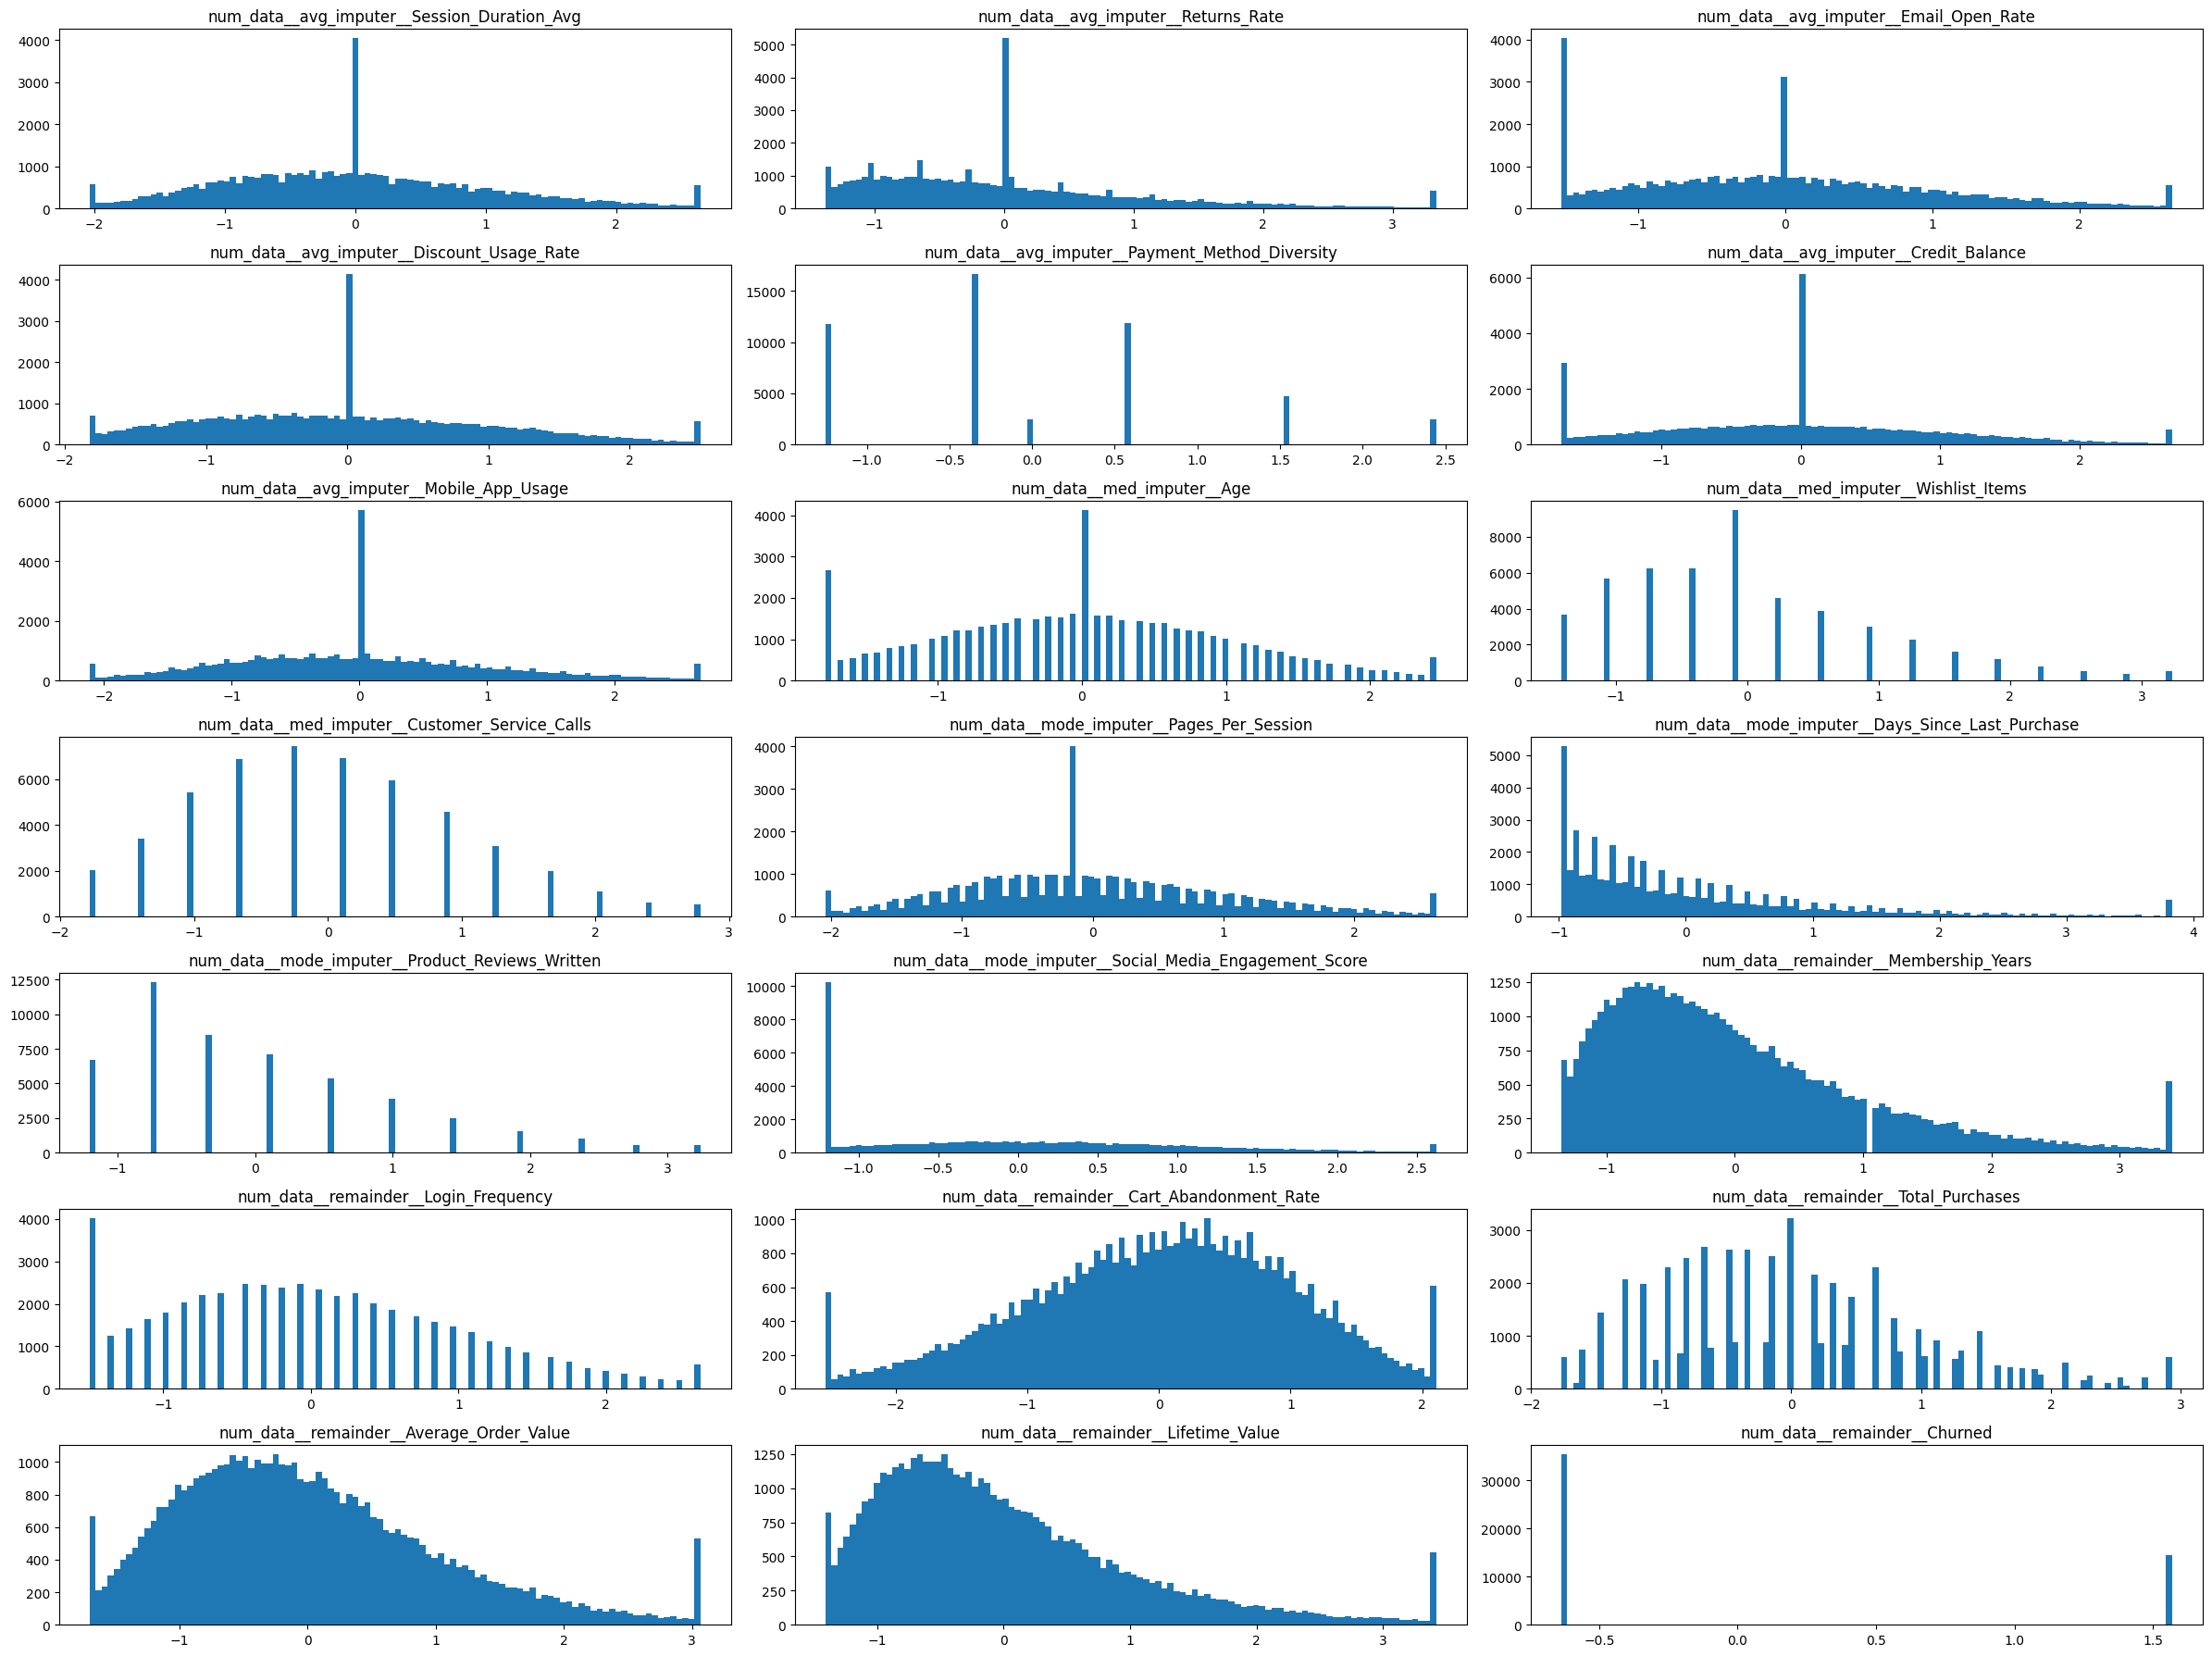

In [32]:
numeric_cols_scaled=df_cust_scaled.columns[df_cust_scaled.dtypes != 'object']
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(24,18))
axes=axes.ravel()
idx=0
for col in numeric_cols_scaled:
    if idx < len(axes): # Added a check to prevent IndexError
        axes[idx].set_title(col)
        axes[idx].hist(df_cust_scaled[col],bins=100)
    idx+=1
plt.tight_layout()
plt.show()

Now let’s check how the numeric columns are related to each other using correlation.

Correlation measures how strongly two variables move together. A positive correlation means both increase or decrease together, while a negative correlation means one increases as the other decreases.

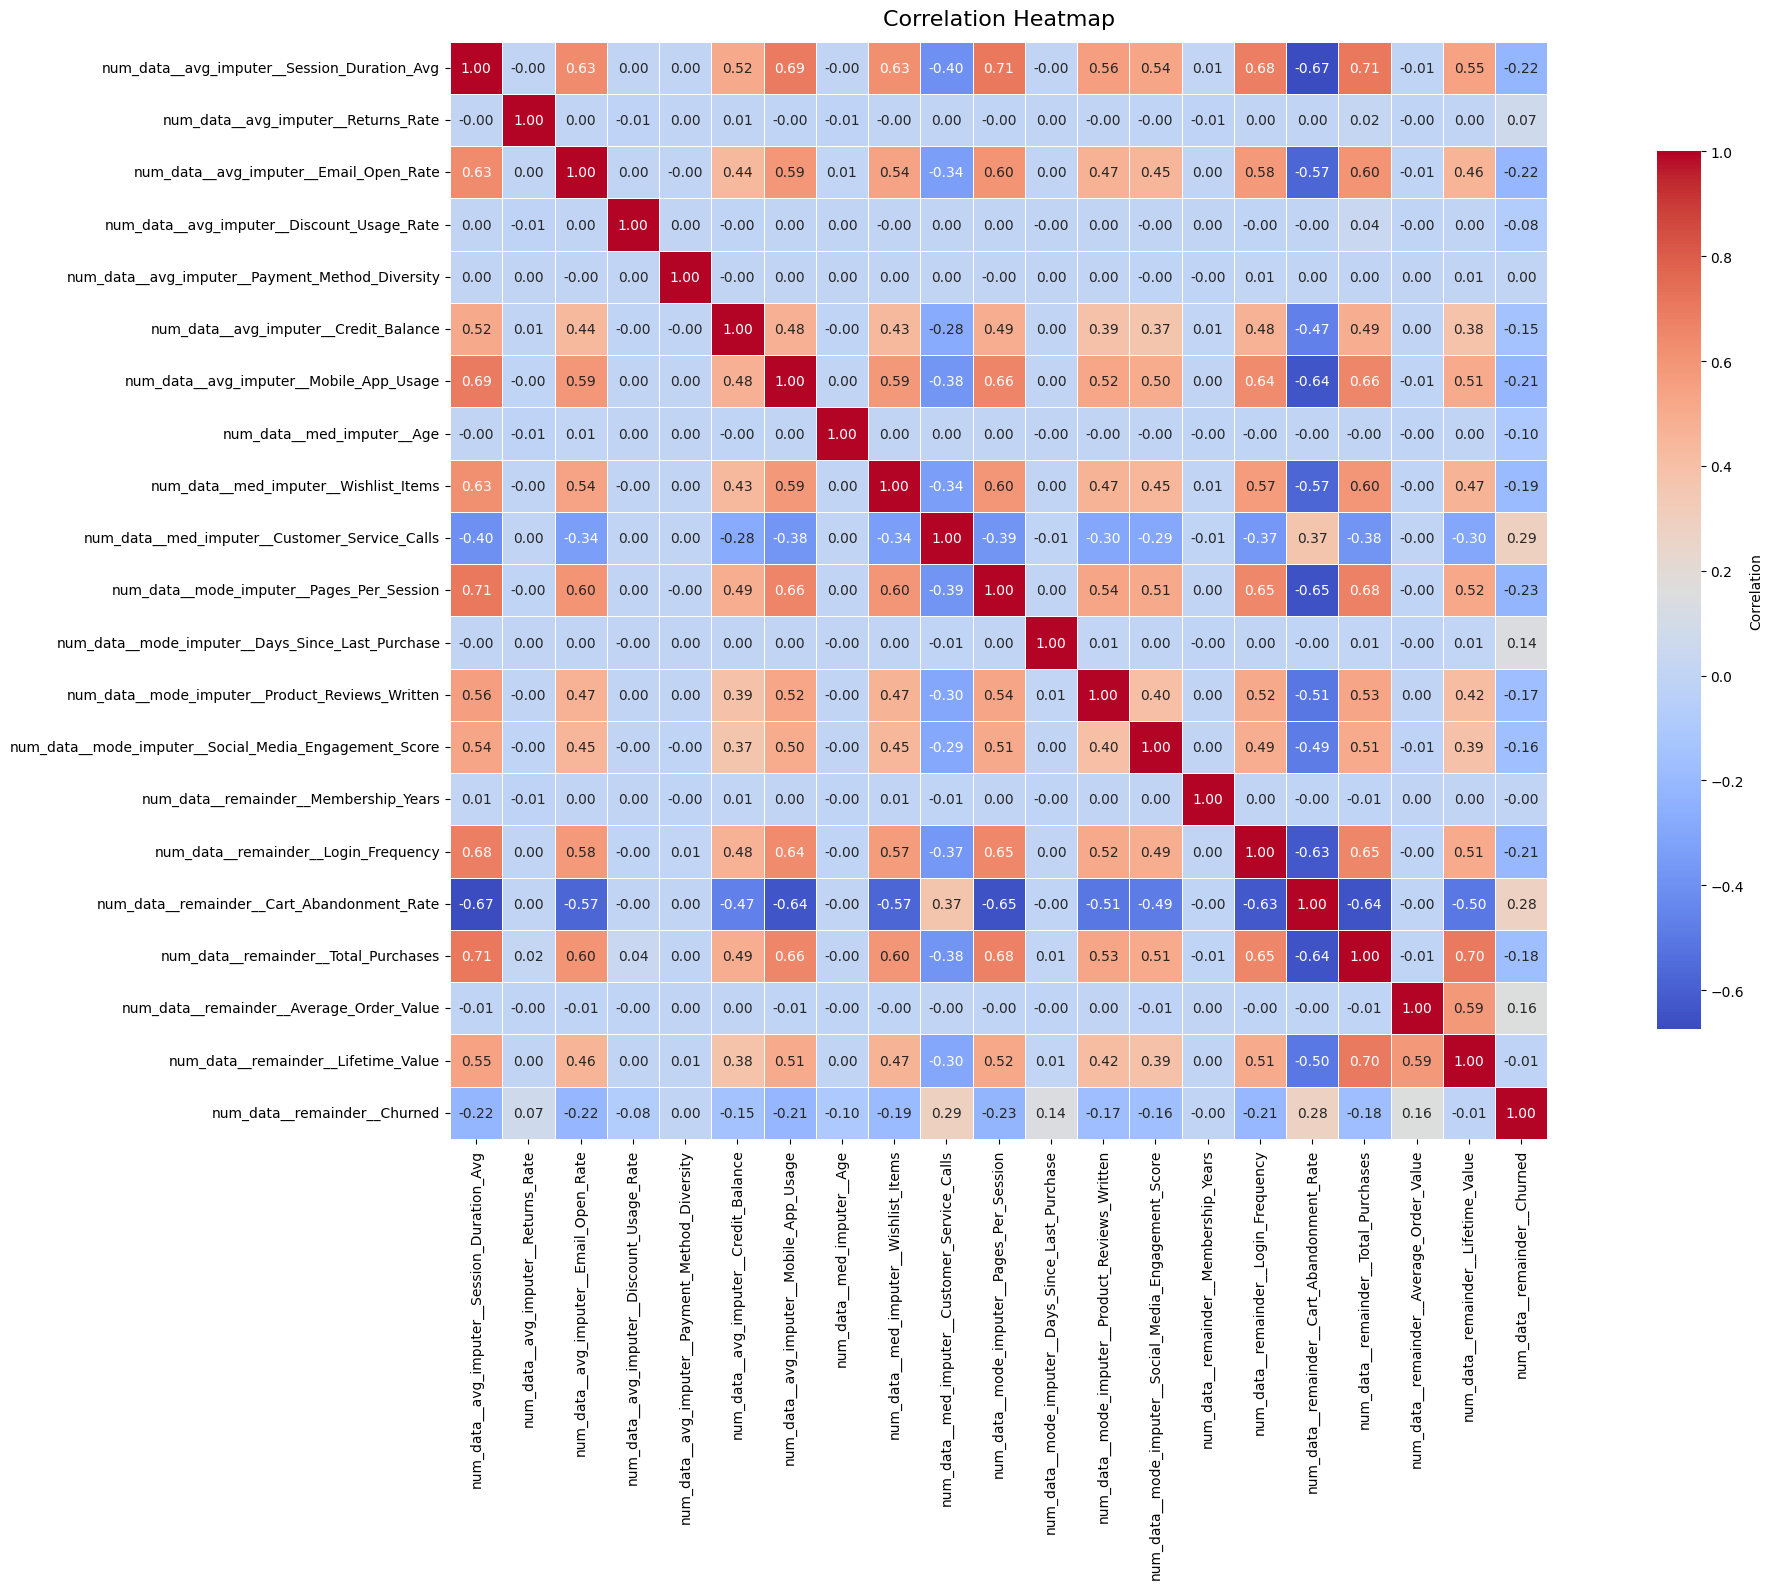

In [33]:
import seaborn as sns

correlations = {}

for col in numeric_cols_scaled:
    correlations[col] = df_cust_scaled[numeric_cols_scaled].corr()[col].to_dict()



# Convert dict-of-dicts to a DataFrame (matrix)
corr_df = pd.DataFrame(correlations)

# Ensure consistent ordering of rows/columns
corr_df = corr_df.loc[numeric_cols_scaled, numeric_cols_scaled]

# Plot heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(corr_df,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5,
            linecolor='white',
            square=True,
            cbar_kws={'shrink': .8, 'label': 'Correlation'})
plt.title('Correlation Heatmap', fontsize=16, pad=12)
plt.tight_layout()
plt.show()


Seaborn is a Python library that makes it easy to create beautiful charts. It’s built on top of Matplotlib and adds simple functions for common plots like histograms, scatter plots, and heatmaps.

Next, we’ll examine the non‑numeric features in the dataset.

We will use pie chart to visualize categorical data. Each slice represents a category, and its size shows the proportion or frequency of that category. This makes it easy to compare groups at a glance and understand how the dataset is distributed across categories.

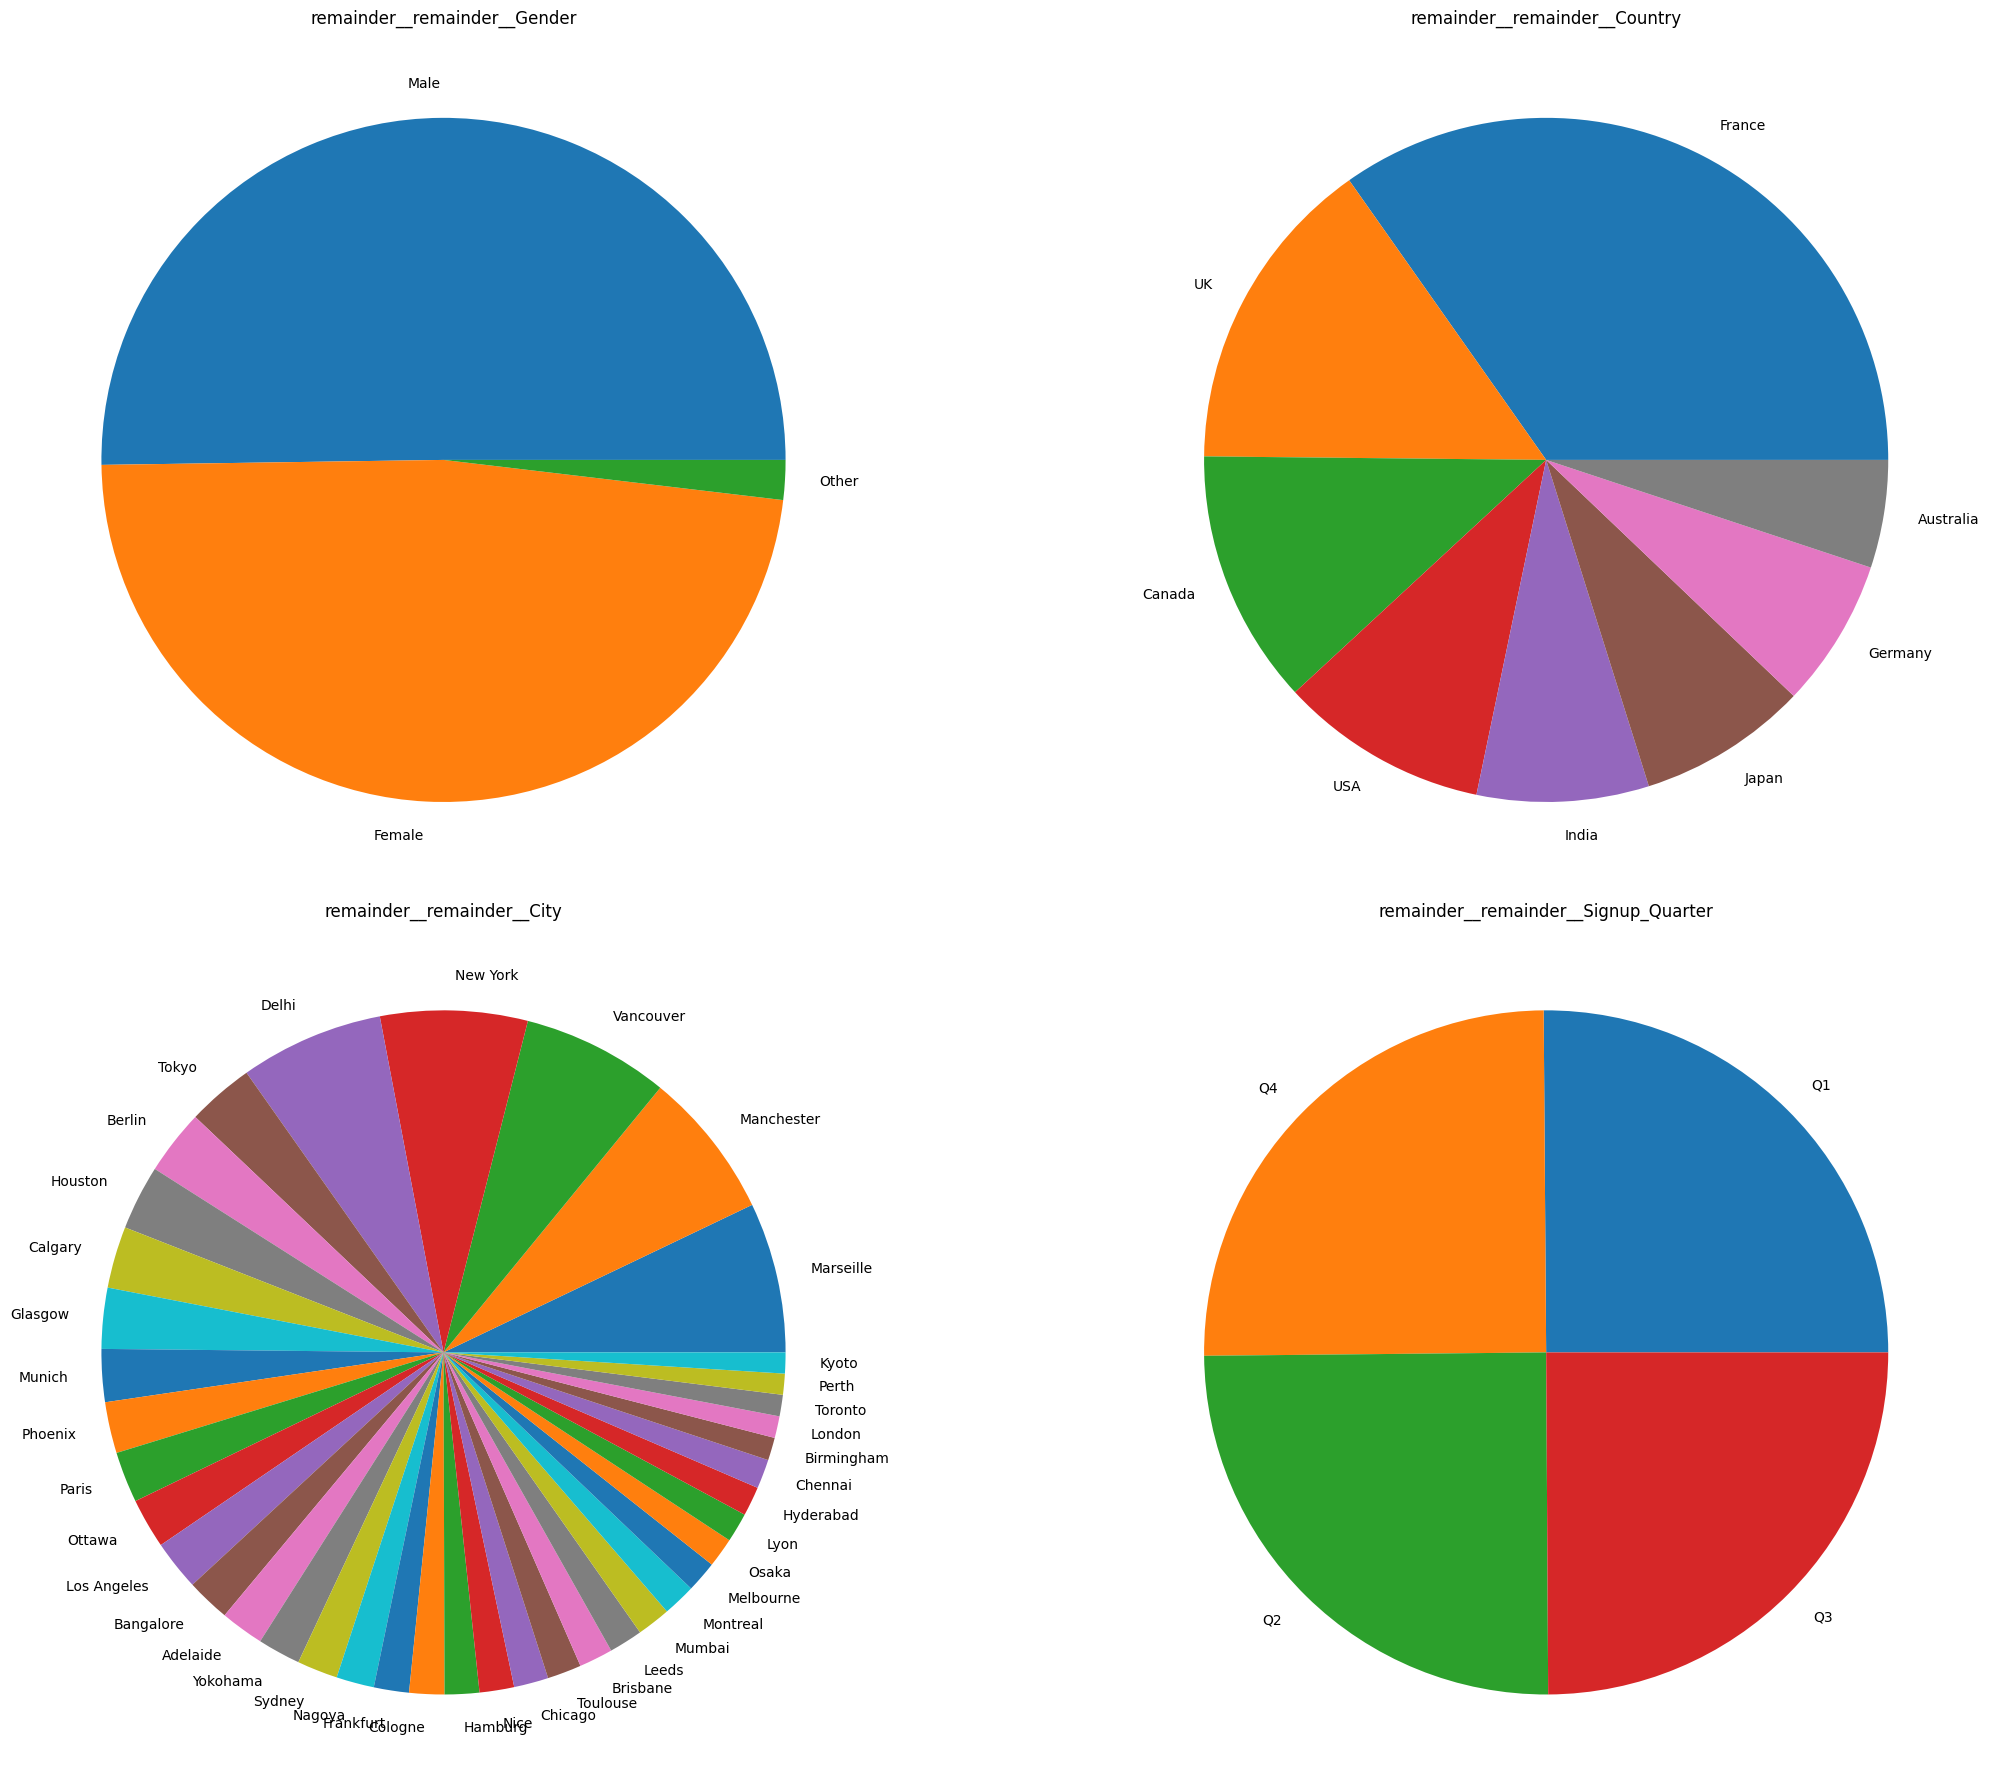

In [34]:
categ_cols=df_cust_scaled.select_dtypes(include=['object', 'category']).columns.tolist()
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(24,18))
axes=axes.ravel()
idx=0
for col in categ_cols:
    axes[idx].set_title(col)
    axes[idx].pie(df_cust_scaled[col].value_counts(),labels=df_cust_scaled[col].unique())
    idx+=1
plt.tight_layout()
plt.show()


Since machine learning models cannot directly process text data, we will convert categorical variables into numerical form using OneHotEncoder.

In [35]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 6.5 MB/s eta 0:00:00


In [36]:
from category_encoders import OneHotEncoder

col_trans = ColumnTransformer([("categ_data", OneHotEncoder(), categ_cols)],
                               remainder='passthrough').set_output(transform="pandas")
df_cust_categ = col_trans.fit_transform(df_cust_scaled)

Let’s check what happens to our categorical columns once we use OneHotEncoder.


In [37]:
df_cust_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 76 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   categ_data__remainder__remainder__Gender_1                        50000 non-null  int64  
 1   categ_data__remainder__remainder__Gender_2                        50000 non-null  int64  
 2   categ_data__remainder__remainder__Gender_3                        50000 non-null  int64  
 3   categ_data__remainder__remainder__Country_1                       50000 non-null  int64  
 4   categ_data__remainder__remainder__Country_2                       50000 non-null  int64  
 5   categ_data__remainder__remainder__Country_3                       50000 non-null  int64  
 6   categ_data__remainder__remainder__Country_4                       50000 non-null  int64  
 7   categ_data__remainder__remainde

As we can see each value in category features has converted into a column (3 value in Gender is completed into 3 columns)

In [38]:
print(df_cust_categ[['categ_data__remainder__remainder__Gender_1', 'categ_data__remainder__remainder__Gender_2','categ_data__remainder__remainder__Gender_3']].head(5).to_string())

   categ_data__remainder__remainder__Gender_1  categ_data__remainder__remainder__Gender_2  categ_data__remainder__remainder__Gender_3
0                                           1                                           0                                           0
1                                           1                                           0                                           0
2                                           0                                           1                                           0
3                                           0                                           1                                           0
4                                           1                                           0                                           0


Apart from above, listed below is some encoder used for non-numerical data

- Label Encoding: Assigns each category a unique integer. Best for ordered data where numbers reflect ranking.
- One‑Hot Encoding: Creates binary columns for each category. Useful for nominal data without any natural order.
- Ordinal Encoding: Maps categories to integers based on order. Ideal when categories have a clear progression.
- Binary Encoding: Converts categories into binary digits across fewer columns. Helps reduce dimensionality for large sets.
- Target/Mean Encoding: Replaces categories with target variable averages. Effective but must avoid data leakage.
- Frequency/Count Encoding: Substitutes categories with their occurrence count. Simple and works well with tree‑based models.


Note: These are some of the ways to pre-process data before using the same for training the model.

#**End of Chapter-2**